In [5]:
# Initialize Otter
import otter
grader = otter.Notebook("hw2_shallow_and_deep_nws.ipynb")

### Completing the notebook on Colab

To complete the notebook on Colab, you can click on the "Open in Colab" button
below and it will open the notebook from our public class notebook repository
on GitHub.

> Note that you will have save the notebook to your own Google Drive by clicking
on File -> Save a Copy in Drive.

> Also note that the Otter Grader cells will not run in Colab, but you can just
> avoid executing those cells. For any public tests, you can submit to Gradescope
> and inspect your results there.

<a href="https://colab.research.google.com/github/DL4DS/sp2025_homeworks/blob/main/hw1/hw2_shallow_and_deep_nws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Completing the notebook in a local environment

For local environments, after setting up your Python and Jupyter environments,
you have the option of using either
* Jupyter Lab or Notebook interface, or with
* VSCode and the Jupyter extension pack

In both cases we strongly encourage you to make sure you have a recent version
of Python (>=3.10) and use a virtual environment such as `venv` or miniconda
environment.

# **HW2.1 -- Activation functions**

The purpose of this practical is to experiment with different activation functions. <br>

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

In [6]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [7]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

In [8]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Pass these through the ReLU function to compute the activations as in
  # figure 3.3 d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [9]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
    return np.maximum(0, preactivation)

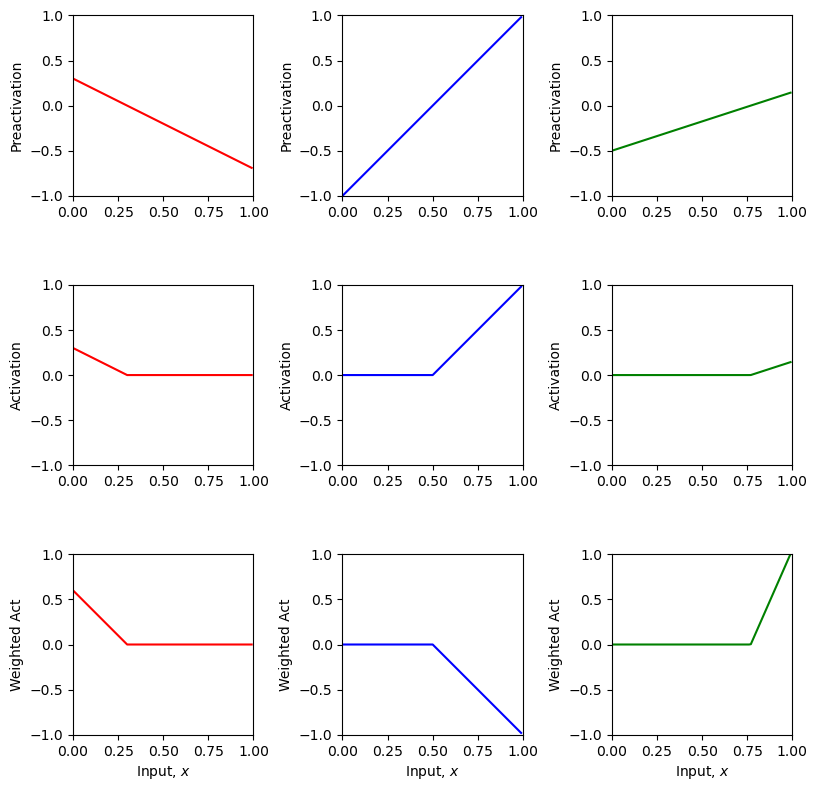

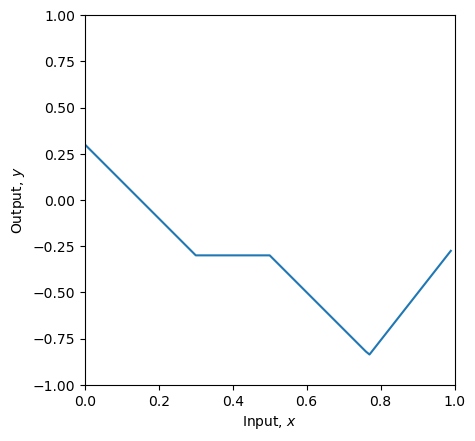

In [10]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Sigmoid activation function

The ReLU isn't the only kind of activation function.  For a long time, people used sigmoid functions.  A logistic sigmoid function is defined by the equation

\begin{equation}
f[z] = \frac{1}{1+\exp{[-10 z ]}}
\end{equation}

(Note that the factor of 10 is not standard -- but it allow us to plot on the same axes as the ReLU examples)

In [11]:
# Define the sigmoid function
def sigmoid(preactivation):
  # TODO write code to implement the sigmoid function and compute the activation at the
  # hidden unit from the preactivation.  Use the np.exp() function.
  activation = 1 / (1 + np.exp(- preactivation))

  return activation

In [12]:
grader.check("q1")

q1 results: All test cases passed!

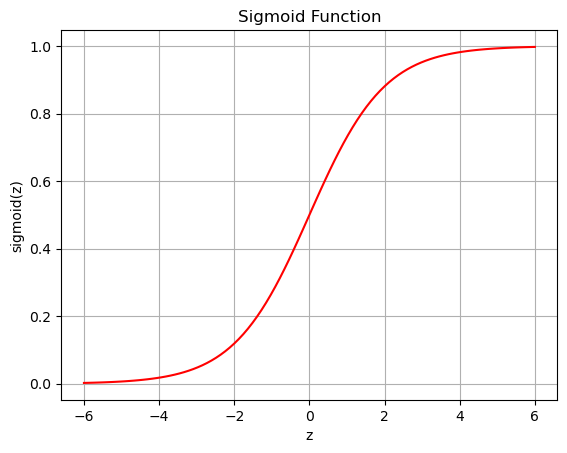

In [13]:
z = np.linspace(-6, 6, 100)

# Compute sigmoid values
sigmoid_values = sigmoid(z)

# Plot
plt.plot(z, sigmoid_values, color='red')
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid Function")
plt.grid()
plt.show()

Let's see what happens when we use this activation function in a neural network

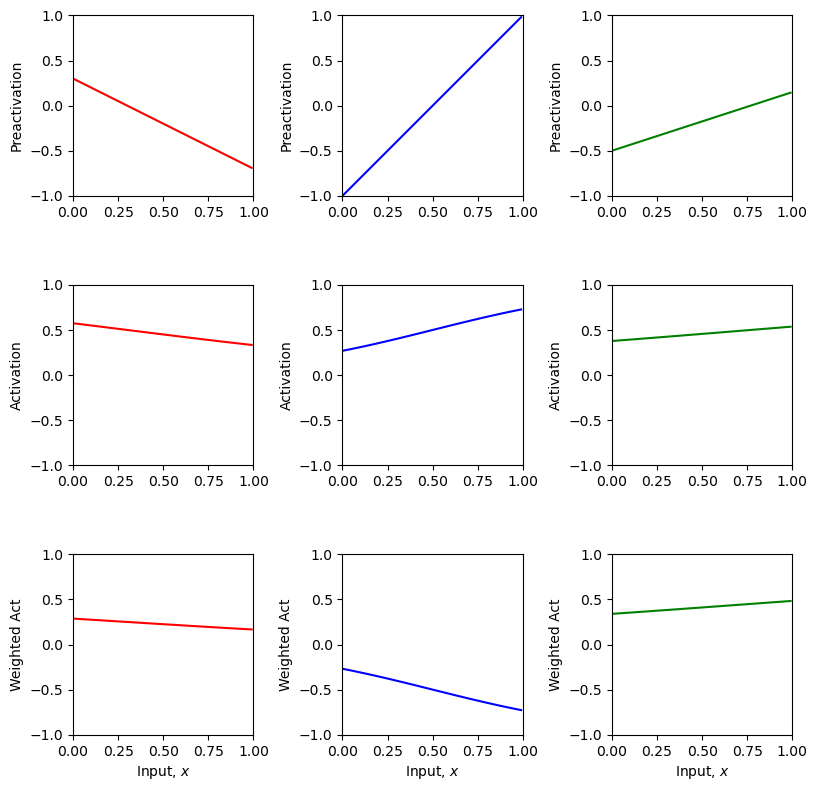

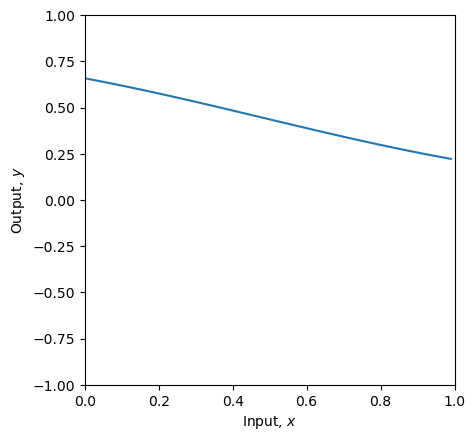

In [14]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, sigmoid, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# **HW2.2 -- Clipping functions**

The purpose of the following cells is to understand how a neural network with two hidden layers build more complicated functions by clipping and recombining the representations at the intermediate hidden variables.

In [15]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [16]:
def shallow_1_1_3_3(x, activation_fn, phi, psi, theta):

    # Preactivations at layer 1 (terms in brackets in equation 4.7)
    layer1_pre_1 = theta[0][0] + theta[0][1] * x
    layer1_pre_2 = theta[1][0] + theta[1][1] * x
    layer1_pre_3 = theta[2][0] + theta[2][1] * x

    # Activation functions (rest of equation 4.7)
    h1 = activation_fn(layer1_pre_1)
    h2 = activation_fn(layer1_pre_2)
    h3 = activation_fn(layer1_pre_3)

    # Preactivations at layer 2 (terms in brackets in equation 4.8)
    layer2_pre_1 = psi[0][0] + psi[0][1] * h1 + psi[0][2] * h2 + psi[0][3] * h3
    layer2_pre_2 = psi[1][0] + psi[1][1] * h1 + psi[1][2] * h2 + psi[1][3] * h3
    layer2_pre_3 = psi[2][0] + psi[2][1] * h1 + psi[2][2] * h2 + psi[2][3] * h3

    # Activation functions (rest of equation 4.8)
    h1_prime = activation_fn(layer2_pre_1)
    h2_prime = activation_fn(layer2_pre_2)
    h3_prime = activation_fn(layer2_pre_3)

    # Weighted outputs by phi (three last terms of equation 4.9)
    phi1_h1_prime = phi[1] * h1_prime
    phi2_h2_prime = phi[2] * h2_prime
    phi3_h3_prime = phi[3] * h3_prime

    # Combine weighted activation and add y offset (summing terms of equation 4.9)
    y = phi[0] + phi1_h1_prime + phi2_h2_prime + phi3_h3_prime

    # Return everything we have calculated
    return y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime

In [17]:
grader.check("q2")

q2 results: All test cases passed!

In [18]:
# # Plot two layer neural network as in figure 4.5
def plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime):

    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,layer2_pre_1,'r-'); ax[0,0].set_ylabel(r'$\psi_{10}+\psi_{11}h_{1}+\psi_{12}h_{2}+\psi_{13}h_3$')
    ax[0,1].plot(x,layer2_pre_2,'b-'); ax[0,1].set_ylabel(r'$\psi_{20}+\psi_{21}h_{1}+\psi_{22}h_{2}+\psi_{23}h_3$')
    ax[0,2].plot(x,layer2_pre_3,'g-'); ax[0,2].set_ylabel(r'$\psi_{30}+\psi_{31}h_{1}+\psi_{32}h_{2}+\psi_{33}h_3$')
    ax[1,0].plot(x,h1_prime,'r-'); ax[1,0].set_ylabel(r"$h_{1}^{'}$")
    ax[1,1].plot(x,h2_prime,'b-'); ax[1,1].set_ylabel(r"$h_{2}^{'}$")
    ax[1,2].plot(x,h3_prime,'g-'); ax[1,2].set_ylabel(r"$h_{3}^{'}$")
    ax[2,0].plot(x,phi1_h1_prime,'r-'); ax[2,0].set_ylabel(r"$\phi_1 h_{1}^{'}$")
    ax[2,1].plot(x,phi2_h2_prime,'b-'); ax[2,1].set_ylabel(r"$\phi_2 h_{2}^{'}$")
    ax[2,2].plot(x,phi3_h3_prime,'g-'); ax[2,2].set_ylabel(r"$\phi_3 h_{3}^{'}$")

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel(r'Input, $x$');
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_xlabel(r'Input, $x$'); ax.set_ylabel(r'Output, $y$')
    ax.set_xlim([0,1]);ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    plt.show()

Now let's define the parameters and visualize the network

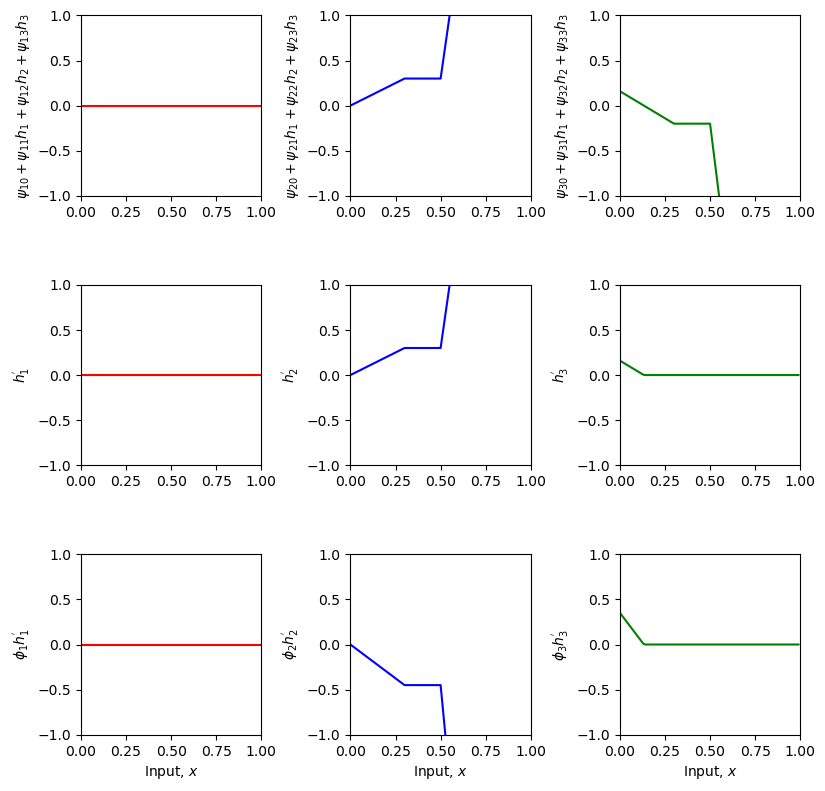

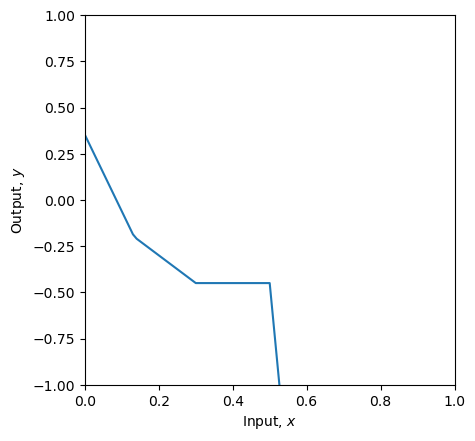

In [44]:
# Define parameters (note first dimension of theta and phi is padded to make indices match
# notation in book)
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] = 0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.3;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
# psi[1,0] = 0.8
psi[2,0] = -0.2;  psi[2,1] = 2.0; psi[2,2] = 1.2; psi[2,3]=-8.0
# psi[2,:] *= -1
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi [3] = 2.2
# phi[3] = -1.0

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)

<!-- BEGIN QUESTION -->

To do:  To test your understanding of this, consider:

1.   What would happen if we increase $\psi_{1,0}$?
2.   What would happen if we multiplied $\psi_{2,0}, \psi_{2,1}, \psi_{2,2},  \psi_{2,3}$ by -1?
3.  What would happen if set $\phi_{3}$ to -1?

You can rerun the code to see if you were correct.



**Answer**. 
1. The graphs on the middle column will shift upwards/downwards, and the final output graph $y$ will shift downwards. 
2. $h_3'$ would significantly change, adding more non-linearity in particular. The output $y$ will increase as $x$ increases on the rightmost segment of the plot (rather than decreasing before multiplying). 
3. The slope of the leftmost segment of $y$ will be more flat. 

<!-- END QUESTION -->

